In [69]:
import os
import sys
import random
import numpy as np
import torch
import h5py
import cv2
from PIL import Image
from torch.autograd import Variable
import matplotlib.pyplot as plt

In [70]:
path = 'result/008_hdr.h5'

In [71]:
f = h5py.File(path, 'r')
print(f.keys())
Data = f['data'][:]
f.close()
gamma = 2.2

<KeysViewHDF5 ['data']>


(1000, 1500, 3)
0.99986327 0.00064067927


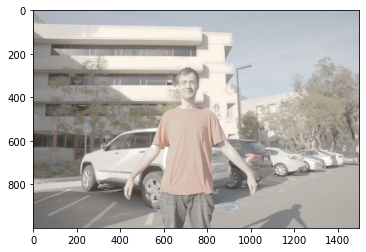

In [72]:
data = np.transpose(Data,(2,1,0))
print(data.shape)
print(data.max(),data.min())
#cv2.imshow('qwe',data)
miu = 5000
hdr = np.log(1 + 5000 * data) / np.log(
            np.array([1 + 5000]))
plt.imshow(hdr)
plt.show()

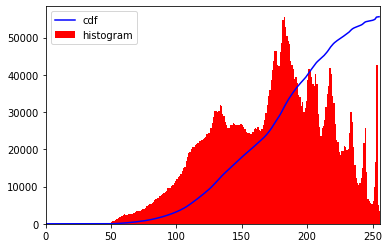

In [73]:
HDR = (hdr*256).astype(np.uint8)
hist,bins = np.histogram(HDR.flatten(),256,[0,256])

cdf = hist.cumsum()
cdf_normalized = cdf * hist.max()/ cdf.max()

plt.plot(cdf_normalized, color = 'b')
plt.hist(HDR.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

In [74]:
cdf_m = np.ma.masked_equal(cdf,0)
cdf_m = (cdf_m - cdf_m.min())*255/(cdf_m.max()-cdf_m.min())
cdf = np.ma.filled(cdf_m,0).astype('uint8')
img2 = cdf[HDR]

In [75]:
print(hdr.shape,HDR.max(),HDR.min())

(1000, 1500, 3) 255 43


In [76]:
def histogram_equalization(img_in):
# segregate color streams
    b,g,r = cv2.split(img_in)
    h_b, bin_b = np.histogram(b.flatten(), 256, [0, 256])
    h_g, bin_g = np.histogram(g.flatten(), 256, [0, 256])
    h_r, bin_r = np.histogram(r.flatten(), 256, [0, 256])
# calculate cdf    
    cdf_b = np.cumsum(h_b)  
    cdf_g = np.cumsum(h_g)
    cdf_r = np.cumsum(h_r)
    
# mask all pixels with value=0 and replace it with mean of the pixel values 
    cdf_m_b = np.ma.masked_equal(cdf_b,0)
    cdf_m_b = (cdf_m_b - cdf_m_b.min())*255/(cdf_m_b.max()-cdf_m_b.min())
    cdf_final_b = np.ma.filled(cdf_m_b,0).astype('uint8')
  
    cdf_m_g = np.ma.masked_equal(cdf_g,0)
    cdf_m_g = (cdf_m_g - cdf_m_g.min())*255/(cdf_m_g.max()-cdf_m_g.min())
    cdf_final_g = np.ma.filled(cdf_m_g,0).astype('uint8')
    cdf_m_r = np.ma.masked_equal(cdf_r,0)
    cdf_m_r = (cdf_m_r - cdf_m_r.min())*255/(cdf_m_r.max()-cdf_m_r.min())
    cdf_final_r = np.ma.filled(cdf_m_r,0).astype('uint8')
# merge the images in the three channels
    img_b = cdf_final_b[b]
    img_g = cdf_final_g[g]
    img_r = cdf_final_r[r]
  
    img_out = cv2.merge((img_b, img_g, img_r))
# validation
    equ_b = cv2.equalizeHist(b)
    equ_g = cv2.equalizeHist(g)
    equ_r = cv2.equalizeHist(r)
    equ = cv2.merge((equ_b, equ_g, equ_r))
    #print(equ)
    #cv2.imwrite('output_name.png', equ)
    return img_out

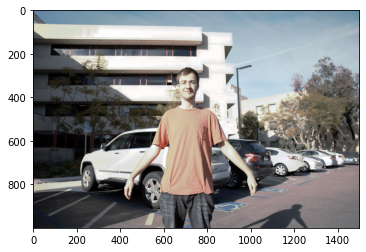

In [77]:
HDR_hist = histogram_equalization(HDR)
plt.imshow(HDR_hist)

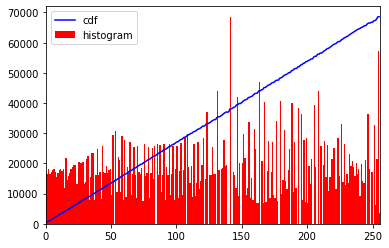

In [78]:
hist,bins = np.histogram(HDR_hist.flatten(),256,[0,256])

cdf = hist.cumsum()
cdf_normalized = cdf * hist.max()/ cdf.max()

plt.plot(cdf_normalized, color = 'b')
plt.hist(HDR_hist.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

<KeysViewHDF5 ['GT', 'IN']>
(1000, 1500, 3)


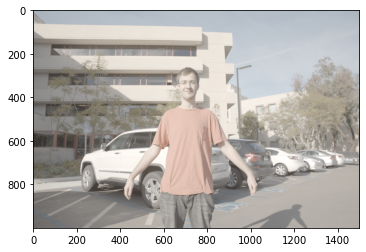

In [79]:
gt_path = 'dataset/Test/008.h5'
f_gt = h5py.File(gt_path, 'r')
print(f_gt.keys())
gt = f_gt['GT'][:]
f_gt.close()
gt = np.transpose(gt,(2,1,0))
gt = np.log(1 + 5000 * gt) / np.log(np.array([1 + 5000]))
print(gt.shape)
plt.imshow(gt)

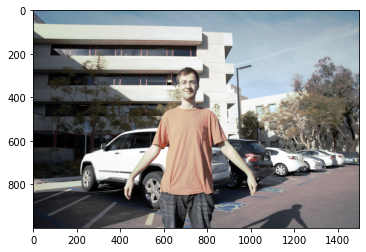

In [80]:
HDR_gt = (gt*256).astype(np.uint8)
HDR_gt = histogram_equalization(HDR_gt)
plt.imshow(HDR_gt)
imgt = Image.fromarray(HDR_gt)
imgt.save("gt.jpeg")

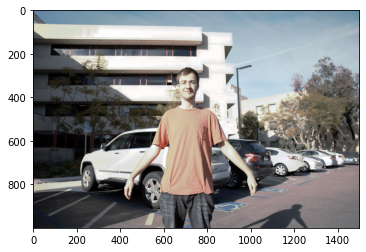

In [81]:
plt.imshow(HDR_hist)
im = Image.fromarray(HDR_hist)
im.save("foo.jpeg")